## Proyecto Final – Machine Learning as a Service (MLaaS)

*__Descripción:__*  
Utilizando el dataset que seleccionó anteriormente, deberá realizar los siguientes pasos para construir un API que realice predicciones.

Dentro de un Notebook deberá construir el código para completar lo siguiente:

1. Crear en Anaconda un environment.
2. Cargar dataset.
3. EDA y Profiling de los datos.
4. Proponer solución de los warnings generados en el EDA.
5. Realice un Split de los datos en 80% training y 20% testing.
6. Tres confguraciones de Setup PyCaret y seleccionar el mejor modelo.
7. Almacenamiento de los 3 pipelines en el disco duro.
8. API sirviendo los 3 modelos.
9. Log por cada predicción generada.
10. Streamlit Web Application consumiendo API



### 1. Crear en Anaconda un environment  
que tenga los componentes y librerías necesarios para ejecutar satisfactoriamente el código, algunas de las librerías que debe considerar son las siguientes:
* __a.__  PyCaret.
* __b.__  Flask.
* __c.__  Streamlit.
* __d.__  Pandas Profilling.

-- Crear un nuevo env con python 3.9:  
`$ conda create --name mlops python=3.9`

-- Activar el nuevo env:  
`$ conda activate mlops`

-- Instalar PyCaret:  
`$ pip install pycaret`

-- Instalar Flask:  
`$ pip install Flask`

-- Instalar Streamlit:  
`$ pip install streamlit`

-- Instalar Pandas Profilling:  
`$ pip install ydata_profiling`

In [1]:
from pycaret.regression import *
from pycaret.datasets import get_data
from flask import Flask, request, jsonify
import pandas as pd
from ydata_profiling import ProfileReport

from datetime import datetime

### 2. Carga de dataset

Cargar los datos dentro del Notebook.

In [5]:
# data cruda se encuentra en el directorio /data/raw/
data = pd.read_csv("../data/raw/Customer_Churn_Dataset.csv")

### 3. EDA y Profiling de los datos.

Realizar un data profiling usando pandas profiling y comentar los resultados en el reporte generado,
especialmente los warnings que puedan aparecer al momento de cargar los datos.

El dataset consta de mas de 440K observaciones de registros de clientes junto con las caracteristicas y etiqueta de abandono que son 4 categoricas y 8 numericas. Contiene una perdida de datos menor a 0.1% y tiene 0 filas duplicadas. 

En las correlaciones, se logra notar una alta correlacion positiva entre las variables Abandono y Total de llamadas a soporte.

La variable abandono consta de 57% con valor 1 (si) y 43% 0 (no)

*__WARNINGS__*  
Se tienen warnings sobre las variables Support Calls y Payment Delay, y warning se refiere a que estas variables contienen gran cantidad de valores Zero  
* Support Calls - 15.9%  
* Payment Delay - 3.8%  

Sin embargo, dada la naturaleza de las variables y los valores que almacena es normal que contengan valores cero, por lo que los Warnings no son tratados.

In [6]:
profile = ProfileReport(data, title ="Customer Churn")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Proponer solución de los warnings generados en el EDA.

_**NOTA:**_ Los Warnings no son tratables, unicamente indican las variables que tienen alta correlacion. Y tambien indican que las variables Payment Delay y Support Calls tienen alta presencia de valores 0 Zero en sus registros, pero dada la naturaleza de los datos que almacenan es normal la presencia de estos valores Zero. por lo tanto: No se proponen tratamiento para los Warning generados_




In [32]:
data.dropna(inplace=True)

### 5. Realice un Split de los datos en 80% training y 20% testing.

Dividir los datos en dos partes, una para train y otra para test.

In [33]:
num_row_train = int(len(data)*0.8)

data_train = data.sample(n=num_row_train, random_state=2023)
data_test = data.drop(data_train.index)

In [34]:
print(f"Data en train: {data_train.shape[0]}")
print(f"Data en test: {data_test.shape[0]}")

Data en train: 352665
Data en test: 88167


In [29]:
print(data.shape)
print(data_train.shape)

(440833, 12)
(352666, 12)


### 5. Tres confguraciones de Setup PyCaret y seleccionar el mejor modelo.  
Utilizar PyCaret y las herramientas de AutoML para construir un modelo que permita realizar las predicciones satisfactoriamente. Deberá incluir al menos tres configuraciones de setup para aplicar ingeniería de características y seleccionar de las tres configuraciones el mejor modelo.  
Recuerde que debe considerar los siguientes aspectos en la ingeniería de características:  
*  Imputación de variables numéricas.__  
* Imputación de variables categóricas.__  
* Codificación de variables categóricas.__  
* Transformación de variables.__  
* Tratamiento de Outliers.__  
* Normalización de características.__  
* Eliminación de características no utilizadas en el modelo.__  

Imputación de variables numéricas:  
  _**Media**_

Imputación de variables categóricas:  
_**moda**_

Codificación de variables categóricas:  
_**one-hot encoding**_

Tratamiento de Outliers:  
_**drop**_

Normalización de características:  
_**Normalizacion**_

Eliminación de características no utilizadas en el modelo:  
_**NaN > 15% ; baja o nula coorrelacion ; Irrelevantes para el modelo**_  
_**CustomerID**_  


In [35]:
dataset = setup(data = data_train,
                target='Churn',
                ignore_features = ['CustomerID'],
#                normalize = True,
#                normalize_method='minmax',
#                session_id=2023,
#                transformation= True, transformation_method = 'yeo-johnson',
#                transform_target = True,
#                remove_outliers= False,
#                remove_multicollinearity = False,
#                low_variance_threshold = 0.1,
#                imputation_type ='simple',
                numeric_imputation ='mean',
                categorical_imputation = 'mode',
                session_id=2023,
                normalize=True,
                normalize_method='minmax',
                transformation=True)


In [36]:
dataset.X_train_transformed


Age  Gender    Tenure  Usage Frequency  Support Calls  \
422930  0.424053     1.0  0.268129         0.884494       0.515625   
167772  0.137206     0.0  0.463274         0.477061       0.770702   
240329  0.083927     0.0  0.323998         0.825326       0.395817   
40624   0.859776     1.0  0.125076         0.795349       0.895480   
210955  0.982881     1.0  0.268129         0.913709       0.770702   
...          ...     ...       ...              ...            ...   
300502  0.000000     1.0  0.248923         0.372494       0.000000   
342255  0.489061     1.0  0.803294         0.543963       0.395817   
368015  0.672403     1.0  1.000000         1.000000       0.238898   
80627   0.028559     0.0  0.817746         0.372494       0.949803   
156427  0.310375     1.0  0.669842         0.000000       0.895480   

        Payment Delay  Subscription Type_Standard  Subscription Type_Premium  \
422930       0.593451                         1.0                        0.0   
167772       0.279881                         1.0                        0.0   
240329       0.706779                         0.0                        1.0   
40624        0.706779                         0.0                        0.0   
210955       0.622799                         1.0                        0.0   
...               ...                         ...                        ...   
300502       0.360332                         1.0                        0.0   
342255       0.000000                         1.0                        0.0   
368015       0.074493                         0.0                        0.0   
80627        0.593451                         1.0                        0.0   
156427       0.563320                         1.0                        0.0   

        Subscription Type_Basic  Contract Length_Quarterly  \
422930                      0.0                        1.0   
167772                      0.0                        0.0   
240329                      0.0                        0.0   
40624                       1.0                        0.0   
210955                      0.0                        0.0   
...                         ...                        ...   
300502                      0.0                        1.0   
342255                      0.0                        1.0   
368015                      1.0                        1.0   
80627                       0.0                        1.0   
156427                      0.0                        0.0   

        Contract Length_Monthly  Contract Length_Annual  Total Spend  \
422930                      0.0                     0.0     0.608662   
167772                      1.0                     0.0     0.106031   
240329                      1.0                     0.0     0.207330   
40624                       1.0                     0.0     0.841716   
210955                      1.0                     0.0     0.852294   
...                         ...                     ...          ...   
300502                      0.0                     0.0     0.710498   
342255                      0.0                     0.0     0.667691   
368015                      0.0                     0.0     0.616701   
80627                       0.0                     0.0     0.809201   
156427                      0.0                     1.0     0.125043   

        Last Interaction  
422930          0.175271  
167772          0.426086  
240329          0.741626  
40624           0.951361  
210955          0.268012  
...                  ...  
300502          0.310335  
342255          0.065860  
368015          0.713313  
80627           0.593891  
156427          0.823494  

[246865 rows x 14 columns]

### 6. Entrenamiento y selección de modelos automática

Deberá comentar cuales son los primeros tres modelos ganadores y sus métricas resultantes.  

a. Para cada uno de estos modelos ganadores, deberá mostrar la gráfica de importancia de caracterís<cas y comentar los resultados.

In [37]:
best = compare_models(exclude = ['lightgbm'], sort='R2')

Initiated  . . . . . . . . . . . . . . . . . .           05:25:09
Status     . . . . . . . . . . . . . . . . . .   Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Linear Regression

Empty DataFrame
Columns: [Model, MAE, MSE, RMSE, R2, RMSLE, MAPE, TT (Sec)]
Index: []

Processing:   0%|          | 0/73 [00:00<?, ?it/s]

Los primeros tres modelos ganadores y sus metricas:


|       Model	                  |  MAE      |	MSE	            |RMSE       |	R2  | RMSLE | MAPE  | TT (Sec)|
|---------------------------------|-----------|-----------------|-----------|-------|-------|-------|---------|
|et   Extra Trees Regressor       |18035.1756 |	1064232775.3860	|31776.9363	|0.8344	|0.1420	|0.0990	|2.1960   |
|gbr  Gradient Boosting Regressor |17253.9484 |	1109715385.8879	|31412.4547	|0.8240	|0.1366	|0.0956	|2.5190   |
|rf	  Random  Forest Regressor    |18725.9620 |	1152904428.9958	|32844.3464	|0.8207	|0.1464	|0.1035	|2.4800   |

In [8]:
ml_et = create_model('et')
ml_gbr = create_model('gbr')
ml_rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Grafica de Importancia de Caracteristicas**

MODELO ET


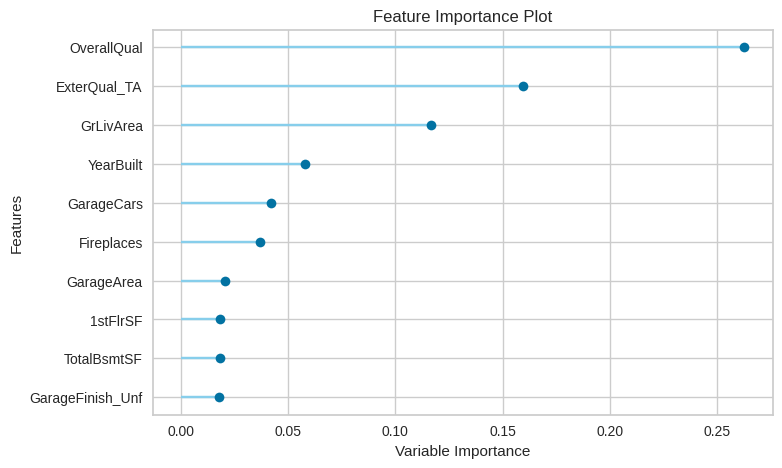

MODELO GBL


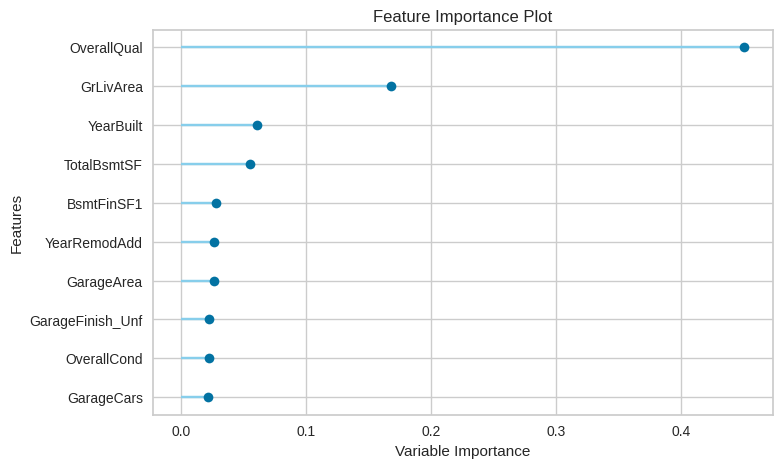

MODELO RF


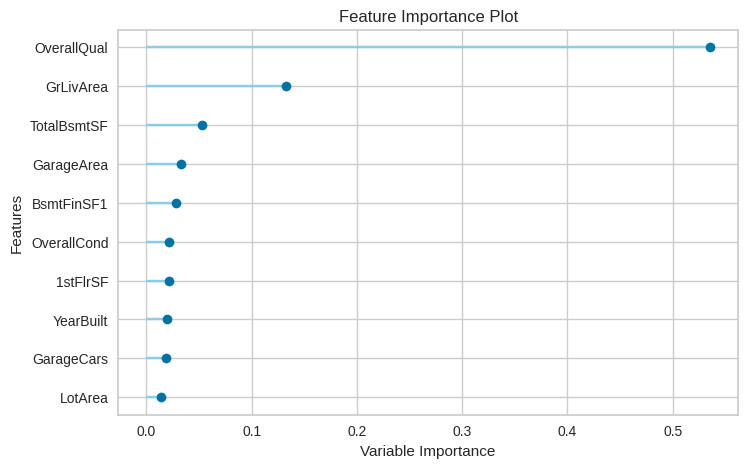

In [9]:
print("MODELO ET")
plot_model(ml_et, plot='feature')

print("MODELO GBL")
plot_model(ml_gbr, plot='feature')

print("MODELO RF")
plot_model(ml_rf, plot='feature')


### 7. Optimización de hiper-parámetros

De los primeros dos modelos deberá realizar opimización de hiper-parámetros
  
----
<br>
 Como podemos ver, se han entrenado los 3 primero modelos y en cada uno de ellos se ha realizado KFold 10 veces.

  De estos, los modelos Gradient Boosting y Random Forest Regressor, son los que mejor funcionan (R2 = 0.8596	y 0.8925, respectivamente). Y es por eso que estos dos modelos gbr y rf son los les haremos tuning de los hiperparametros para mejorarlos un poco mas.




In [10]:
ml_gbr = tune_model(estimator=ml_gbr)
ml_rf = tune_model(estimator=ml_rf, optimize = 'R2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### 8. Selección del modelo final

En función de los resultados obtenidos por la optimización de hiper-parámetros deberá seleccionar el modelo ganador.



|       Model	                  |  MAE      |	MSE	            |RMSE       |	R2  | RMSLE | MAPE  | |
|---------------------------------|-----------|-----------------|-----------|-------|-------|-------|---------|
|gbr  Gradient Boosting Regressor |19918.2068	 |	1090488275.0001		|32310.9210	|0.8204	|0.1511	|0.1106	| |
|rf	  Random  Forest Regressor    |21592.1015|	1329914692.5904|35750.8815	|0.7982	|0.1670	|0.1203	| |



**El modelo ganador es gbr por tener un R2 mas alto de 0.8204, sobre 0.7982 de rf.

In [11]:
final_model = finalize_model(estimator=ml_gbr)

### 9. Almacenamiento del pipeline en el disco duro.

Se guardará en la ubicacion segun la jerarquia de la plantilla utilizada de cookiecutter template. Que la ruta es: '/models/model_v1'

In [17]:
save_model(model=final_model, model_name='/content/drive/MyDrive/GALILEO/Colab/papd/pd/lab2/pycaret/models/model_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1'...
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.2,
                                            max_features='sqrt',
             

### Predicciones

Una vez almacenado el pipeline entrenado, deberá realizar las predicciones sobre el 20% de los datos almacenados para este propósito, cargando
el modelo desde el path donde lo almacenó.**texto en negrita**

In [18]:
model = load_model('/content/drive/MyDrive/GALILEO/Colab/papd/pd/lab2/pycaret/models/model_v1')

Transformation Pipeline and Model Successfully Loaded


In [19]:
model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                             'LotArea', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             '...
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(learning_rate=0.2,
                                           max_features='sqrt',
                                           min_impurity_decrease=0.01,
                                           min_samples_leaf=3,
                                           min_samples_split=5,
                                           n_estimators=130, random_state=385,
                                           subsample=0.6))])

In [20]:
predicciones = predict_model(model, data=data_test)
predicciones

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
1            Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
21           Bnk    AllPub  ...    NaN  GdPrv         NaN       0      6   
27           Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
29           Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
31           Lvl    AllPub  ...    NaN  MnPrv         NaN       0      6   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1447         Lvl    AllPub  ...    NaN    NaN         NaN       0     12   
1449         Lvl    AllPub  ...    NaN    NaN         NaN       0      8   
1451         Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
1455         Lvl    AllPub  ...    NaN    NaN         NaN       0      8   
1458         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   

     YrSold SaleType  SaleCondition  SalePrice  prediction_label  
1      2007       WD         Normal     181500     174486.609481  
21     2007       WD         Normal     139400     139753.273083  
27     2010       WD         Normal     306000     295010.684983  
29     2008       WD         Normal      68500      62227.124820  
31     2008       WD         Normal     149350     140437.296588  
...     ...      ...            ...        ...               ...  
1447   2007       WD         Normal     240000     273489.564113  
1449   2006       WD        Abnorml      92000      86936.764718  
1451   2009      New        Partial     287090     260916.234322  
1455   2007       WD         Normal     175000     172065.136711  
1458   2010       WD         Normal     142125     138869.150817  

[292 rows x 82 columns]

### 11. Cálculo de métricas de rendimiento

Con los datos predichos deberá calcular el R2,
RMSE, MSE y MAPE. Además de proporcionar sus comentarios finales sobre los resultados.

|Model	|MAE	|MSE	|RMSE	|R2	|RMSLE	|MAPE|
|-------|-----|-----|-----|---|-------|----|
|0	Light Gradient Boosting Machine	|1506.4913	|3077860.9119	|1754.3833	|0.2217	|0.9312	|2.8487|
<br>  

  
---
<BR>  

**Comentarios finales:**  
Los dos modelos finales tenian valores de R2 un poco diferentes, pero al aplicarle un tuning de pycaret, estos variaron un poco y se mejoró el modelo para predicciones.  
Esa es la razón por la que al final el R2 del modelo en produccion difiera un poco del R2 del mismo modelo en training. Esto gracias a que se utilizó el parametro optimize = 'R2',
de la funcion tune_model. Ejemplo de uso: ml_gbr = tune_model(estimator=ml_gbr, optimize = 'R2'), y asi podemos optimizar según el indicador que deseamos optimizar (MAE, RMSE, etc)


